## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

In [1]:
import keras

# dataset
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# Functions to create the NN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# library to the visualization
import matplotlib.pyplot as plt

In [2]:
# Load the data in variables
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[364].shape

(32, 32, 3)

[1]


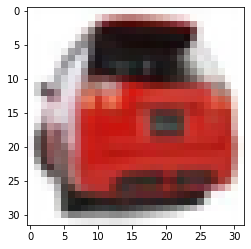

In [4]:
## Let's look at one of the images

print(y_train[364])
plt.imshow(x_train[364]);

In [5]:
# define the number of the classes
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
# Let's build a CNN using Keras' Sequential capabilities

# use a secuential model
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))

# activation function to the layer
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))

# dropout to the regularization
model_1.add(Dropout(0.5))

# layer of the output with a softmax
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

In [9]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 59s 34ms/step - loss: 1.7139 - accuracy: 0.3741 - val_loss: 1.4042 - val_accuracy: 0.4913
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4448 - accuracy: 0.4773 - val_loss: 1.2945 - val_accuracy: 0.5342
Epoch 3/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3436 - accuracy: 0.5184 - val_loss: 1.2647 - val_accuracy: 0.5434
Epoch 4/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2724 - accuracy: 0.5461 - val_loss: 1.2870 - val_accuracy: 0.5509
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2248 - accuracy: 0.5667 - val_loss: 1.1203 - val_accuracy: 0.6026
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1880 - accuracy: 0.5827 - val_loss: 1.1184 - val_accuracy: 0.6085
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1586 - accuracy: 0.5910 - val_loss: 1.0793 -

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [11]:
# Initialize the sequential model
model_2 = Sequential()

# Adding the first conv layer
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
    # Adding the activation function
model_2.add(Activation('relu'))

# Adding the second conv layer
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

# Maxpooling to reduce the features
model_2.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding the dropout for the maxpooling
model_2.add(Dropout(0.25))

# Adding the thrid conv layer
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# Adding the thrid conv layer
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))

# Maxpooling to reduce the features
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Adding the flatten layer to flat the features
model_2.add(Flatten())

# Add a dense layer ( or fully conected)
model_2.add(Dense(512))
model_2.add(Activation('relu'))
# Dropout to reduce the number of neurons
model_2.add(Dropout(0.5))

# Adding the final layer to predict the classes
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [12]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

C:\Users\Vicente\Documents\COURSERA\venv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.5833 - accuracy: 0.4258 - val_loss: 1.3902 - val_accuracy: 0.5089
Epoch 2/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.1981 - accuracy: 0.5765 - val_loss: 1.0603 - val_accuracy: 0.6276
Epoch 3/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.0271 - accuracy: 0.6400 - val_loss: 0.9707 - val_accuracy: 0.6618
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 0.9253 - accuracy: 0.6768 - val_loss: 0.8958 - val_accuracy: 0.6954
Epoch 5/5
1563/1563 [==============================] - 139s 89ms/step - loss: 0.8627 - accuracy: 0.7028 - val_loss: 0.8162 - val_accuracy: 0.7222
